In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score


In [2]:
# Use the same cleaned dataset or selected features
df = pd.read_csv(r"C:\ML project\heart_disease.csv")

# Separate features (drop target)
X = df.drop(columns=["target"])
y = df["target"]  # we’ll compare later

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Shape:", X_scaled.shape)


Shape: (297, 11)


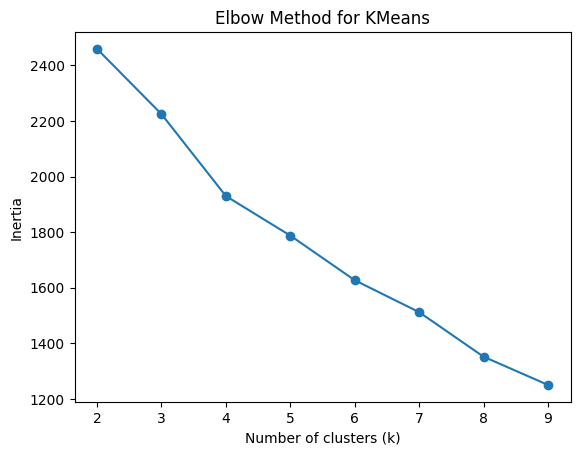

In [3]:
inertias = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(K_range, inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for KMeans')
plt.show()


In [4]:
k = 2  # choose based on elbow plot
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

df["kmeans_cluster"] = kmeans_labels

print("Cluster counts:\n", df["kmeans_cluster"].value_counts())


Cluster counts:
 kmeans_cluster
1    149
0    148
Name: count, dtype: int64


In [5]:
silhouette = silhouette_score(X_scaled, kmeans_labels)
print("Silhouette Score:", round(silhouette, 3))


Silhouette Score: 0.239


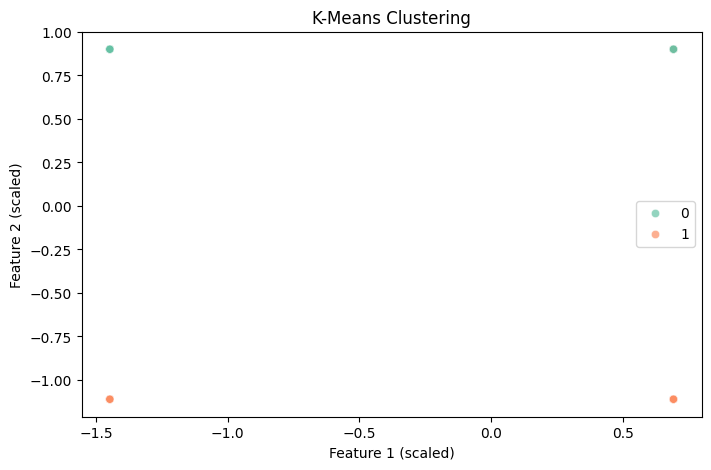

In [6]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x=X_scaled[:, 0],
    y=X_scaled[:, 1],
    hue=kmeans_labels,
    palette="Set2",
    alpha=0.7
)
plt.title("K-Means Clustering")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()


In [7]:
ct = pd.crosstab(df["kmeans_cluster"], df["target"])
print("KMeans Cluster vs Target:\n")
print(ct)


KMeans Cluster vs Target:

target            0    1
kmeans_cluster          
0               125   23
1                35  114


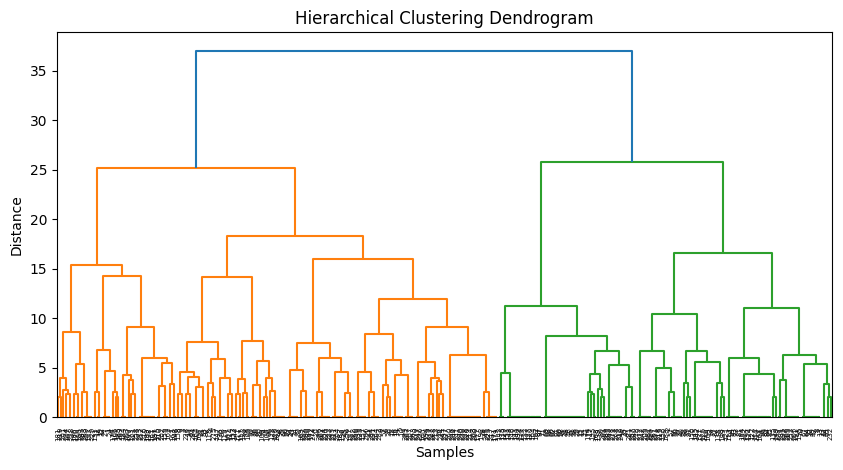

In [8]:
Z = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


In [10]:
from sklearn.cluster import AgglomerativeClustering

# For Ward linkage you only need to set linkage; Ward implies Euclidean distance.
hc = AgglomerativeClustering(n_clusters=2, linkage='ward')
hc_labels = hc.fit_predict(X_scaled)

df['hc_cluster'] = hc_labels
print(df['hc_cluster'].value_counts())


hc_cluster
1    169
0    128
Name: count, dtype: int64


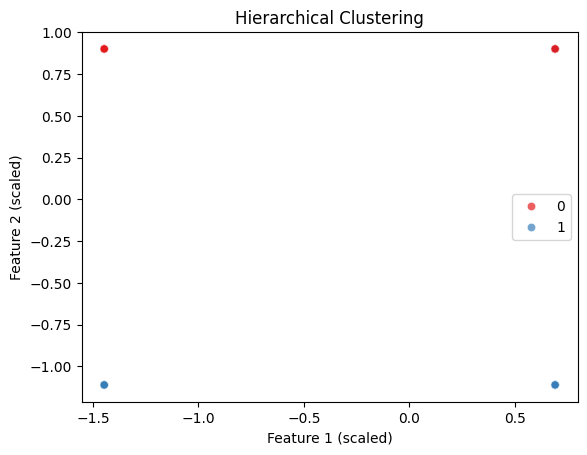

In [11]:
sns.scatterplot(
    x=X_scaled[:, 0],
    y=X_scaled[:, 1],
    hue=hc_labels,
    palette="Set1",
    alpha=0.7
)
plt.title("Hierarchical Clustering")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()


In [12]:
print("Hierarchical Clustering vs Target:")
print(pd.crosstab(df["hc_cluster"], df["target"]))


Hierarchical Clustering vs Target:
target        0    1
hc_cluster          
0           108   20
1            52  117


In [15]:
import os

# make sure the 'results' folder exists
os.makedirs(r"C:\ML project\results", exist_ok=True)

# save your clustering results file
df.to_csv(r"C:\ML project\results\clustering_results.csv", index=False)

print("✅ Saved successfully to C:\\ML project\\results\\clustering_results.csv")


✅ Saved successfully to C:\ML project\results\clustering_results.csv
